In [1]:
# import libraries
import pandas as pd
import numpy as np
import os

# If-Statements with User-Defined Functions

In [2]:
# Define function

def add_num(x,y):
    sum= x+y
    return sum

In [3]:
# What would happen if you called your new function with the arguments 9 and 11?

          #Run function

In [4]:
add_num(9,11)

20

In [5]:
path = r'C:\Users\jacks\OneDrive\Documents\Elise\Instacart-Basket'

In [6]:
df_ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

In [7]:
# And your Instacart dataframe is, indeed, large.
# To avoid any potential issues, let’s just work with a subset of the dataframe for now—the first one million rows.

df =df_ords_prods_merge[:1000000]

In [8]:
df.shape

(1000000, 14)

In [9]:
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [10]:
# This creates a new column within the df dataframe called “price_range” and designates it as the location for your labels.
#This axis = 1 stands for “rows,”.

df['price_range'] = df.apply(price_label, axis=1)


C:\Users\jacks\AppData\Local\Temp\ipykernel_42712\3558157555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [11]:
#  run the value_counts() function to check the values in your new column. Notice that you don’t have any rows with the “High-range product” label. 
#This means there aren’t any products within the dataframe greater than $15

df['price_range'].value_counts(dropna=False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [12]:
# Why not check, then, what the most expensive product within the subset is? This can be done via the max() function:
# You’ve now created your first user-defined function and used it to sort your data into different categories
df['prices'].max()

14.8

# If-Statements with the loc() Function

#### By using loc(), you can apply the conditional logic of an if-statement to a function without explicitly creating an if-else construct.

In [13]:
## First, let’s create some conditions, which will look somewhat similar to the conditions you created in the previous method:

In [14]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\jacks\AppData\Local\Temp\ipykernel_42712\1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [15]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [16]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [17]:
df['price_range_loc'].value_counts(dropna=False)

Mid-range product    756450
Low-range product    243550
Name: price_range_loc, dtype: int64

### the loc() function locates a particular column in the dataframe it’s been assigned to. Now, a logical operator (smaller than, larger than, equal to, etc.) is being added into the function, as well. This is used to create a condition. The difference here is that there’s no explicit if in your if-statement.

In [18]:
#  In normal language, then, you could say “if the values in the ‘prices’ column of the df dataframe are greater than 15.”
#After the comma comes the implied “then.” Here, a new column called “price_range_loc” is being set equal to the string “High-range product.” 
#This is the same as the label you created in your user-defined function.

In [19]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [20]:
df_ords_prods_merge.loc[(df_ords_prods_merge['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [21]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [22]:
df_ords_prods_merge['price_range_loc'].value_counts(dropna=False)

NaN                   21105547
Low-range product     10126366
Mid-range product       756450
High-range product      417678
Name: price_range_loc, dtype: int64

#  If-Statements with For-Loops

###  For-loops, as their name implies, are loops for running the same block of code multiple times. They’re used to perform the same function on multiple elements, for instance, by running through an entire dataframe and performing a function on each row within that dataframe.

In [23]:
# In the code below, a for-loop is used to print the statement
#“My age is X” for the ages 30 to 45 (and substituting the age in question for “X” for each one).
# Without a for-loop, you’d need to manually print statements for each age yourself, like you see below:



In [24]:
print("My age is 30")

My age is 30


In [25]:
print("My age is 32")

My age is 32


In [26]:
print("My age is 33")

My age is 33


In [27]:
# With a for-loop, however, you can print everything with a single command:

In [28]:
for x in range(30,45):
    print(" My age is %d" % (x))

 My age is 30
 My age is 31
 My age is 32
 My age is 33
 My age is 34
 My age is 35
 My age is 36
 My age is 37
 My age is 38
 My age is 39
 My age is 40
 My age is 41
 My age is 42
 My age is 43
 My age is 44


In [72]:
#create a new column in your ords_prods_merge dataframe that summarizes how busy each day of the week is.
#This would be valuable information for stakeholders as it could give them insight 
# into what products are being bought on the busiest and slowest days. 
#They could use this information to tailor ads on specific days.



In [30]:
df_ords_prods_merge.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  aisle_id  department_id  prices _merge    price_range_loc  
0         Soda        77              7     9.0   both  Mid-range product  
1         Soda        77              7     9.0   both  Mid-range product  
2         Soda        77              7     9.0   both  Mid-range product  
3         Soda        77              7     9.0   both  Mid-range product  
4         Soda        77              7     9.0   both  Mid-range product

In [31]:
df_ords_prods_merge.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

In [32]:
df_ords_prods_merge.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  aisle_id  department_id  prices _merge    price_range_loc  
0         Soda        77              7     9.0   both  Mid-range product  
1         Soda        77              7     9.0   both  Mid-range product  
2         Soda        77              7     9.0   both  Mid-range product  
3         Soda        77              7     9.0   both  Mid-range product  
4         Soda        77              7     9.0   both  Mid-range product

In [33]:
# you can see that the value 0 means Saturday. This value has the highest frequency, which means that Saturday is the busiest day.
df_ords_prods_merge['orders_day_of_week'].value_counts(dropna=False)

0    6204404
1    5660456
6    4496635
2    4213986
5    4205906
3    3840701
4    3783953
Name: orders_day_of_week, dtype: int64

In [34]:
# create a new column, “busiest day,” that will contain one of three different values: “Busiest day,” “Least busy,” and “Regularly busy.” This can be done by way of a for-loop.

result = []

for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

## That something comes below it, where you’ll see a familiar if-else structure. If the value in that row is equal to 0, a string value of “Busiest day” is appended to your currently blank result list. If not, and if the value is equal to 4, a string value of “Least busy” is appended to the result list. And finally, if neither of the above conditions have been met, then a string value of “Regularly busy” is appended to the result list.

In [35]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [36]:
df_ords_prods_merge['Busiest day']= result

In [37]:
df_ords_prods_merge['Busiest day'].value_counts(dropna=False)

Regularly busy    22417684
Busiest day        6204404
Least busy         3783953
Name: Busiest day, dtype: int64

# 02. Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). 

In [38]:
# 2: creating new variable 'busiest days'

result_2 = []

for value in df_ords_prods_merge['orders_day_of_week']:
      if value in [0,1]:
            result_2.append("Busiest days")
      elif value in [3,4]:
        result_2.append("Slowest days")
      else:
        result_2.append("Regularly busy")

In [39]:
result_2

['Regularly busy',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Slowest days',
 'Regularly busy',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest 

In [40]:
df_ords_prods_merge['Busiest days']= result_2

In [41]:
# 3.Check the values of this new column for accuracy. Note any observations in markdown format
df_ords_prods_merge['Busiest days'].value_counts(dropna=False)

Regularly busy    12916527
Busiest days      11864860
Slowest days       7624654
Name: Busiest days, dtype: int64

# 4. When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

In [42]:
df_time = df_ords_prods_merge['order_hour_of_day'].value_counts()

In [43]:
# frequency

df_time

10    2761862
11    2736242
14    2689251
15    2662246
13    2661057
12    2618613
16    2535313
9     2454273
17    2087721
8     1718182
18    1636566
19    1258352
20     976182
7      891082
21     795658
22     634247
23     402335
6      290500
0      218786
1      115706
5       87964
2       69377
4       53245
3       51281
Name: order_hour_of_day, dtype: int64

In [44]:
 # grouping hours into time periods of the day
    
hour = []

In [45]:
for x in df_ords_prods_merge['order_hour_of_day']:
      if x in range (0,6):
        hour.append("12am-5am")
      elif x in range (6,12):
        hour.append("6am-11am")
      elif x in range (12,18):
        hour.append("12pm-5pm")
      else:
        hour.append("6pm-11pm")

In [46]:
#  Merging the time periods to df_ords_prods_merge

df_ords_prods_merge['period_of_day'] = hour

In [47]:
df_ords_prods_merge.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  aisle_id  department_id  prices _merge    price_range_loc  \
0         Soda        77              7     9.0   both  Mid-range product   
1         Soda        77              7     9.0   both  Mid-range product   
2         Soda        77              7     9.0   both  Mid-range product   
3         Soda        77              7     9.0   both  Mid-range product   
4         Soda        77              7     9.0   both  Mid-range product   

      Busiest day    Busiest days period_of_day  
0  Regularly busy  Regularly busy      6am-11am  
1  Regularly busy    Slowest days      6am-11am  
2  Regularly busy    Slowest days      12pm-5pm  
3      Least busy    Slowest days      6am-11am  
4      Least busy    Slowest days      12pm-5pm

In [48]:
df_ords_prods_merge['period_of_day'].value_counts(dropna = False)

12pm-5pm    15254201
6am-11am    10852141
6pm-11pm     5703340
12am-5am      596359
Name: period_of_day, dtype: int64

#### Busiest period of day is 12pm - 5pm. Slowest period of day is 12am-5am.

In [49]:
# label busiest periods of the day
    
busiest_periods = []

In [71]:
for x in df_ords_prods_merge['order_hour_of_day']:
    if x in range (12,18):
        busiest_periods.append("Most orders")
        elif x in range (0,6):
            busiest_periods.append("Fewest orders")
            elif:
                busiest_periods.append("Average orders")


SyntaxError: invalid syntax (1908119994.py, line 4)

In [58]:
import keyword
print(keyword.kwlist)

['False', 'None', 'True', '__peg_parser__', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [61]:
time = list(df_time.index)

In [62]:
frequency = list(df_time)

In [63]:
import matplotlib.pyplot as plt

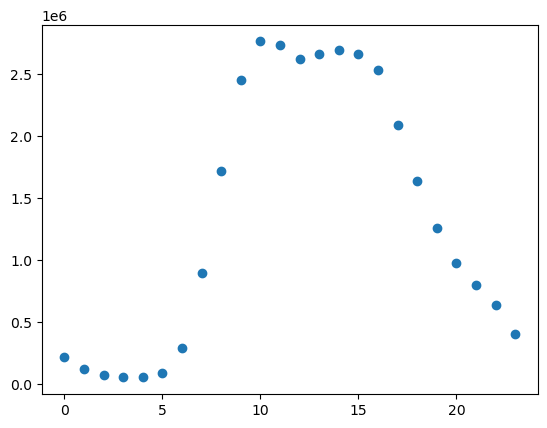

In [64]:
plt.plot(time, frequency, 'o')

In [73]:
# The graph suggest 9 to 16 - 'Most orders', 0 to 6 -'Fewest orders

In [74]:
#Export dataframe as a pickle file

df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_2.pkl'))